# Análise Temporal - Sistema E-Saúde
### Perfil de Atendimento Outros Profissionais de Nível Superior


In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import glob
import os
import warnings
warnings.filterwarnings('ignore')

# Configurações para melhor visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


## 1. Carregamento de Todos os Datasets

In [2]:
# Função para carregar todos os datasets
def carregar_todos_datasets():
    """
    Carrega todos os datasets CSV da pasta Dados/
    Retorna um dicionário com os dataframes e um dataframe consolidado
    """
    
    # Lista todos os arquivos CSV (exceto dicionário)
    arquivos_csv = glob.glob('Dados/*.csv')
    arquivos_csv = [f for f in arquivos_csv if 'Dicionario' not in f]
    arquivos_csv.sort()  # Ordena por nome
    
    print(f"Encontrados {len(arquivos_csv)} arquivos de dados:")
    for arquivo in arquivos_csv:
        print(f"  - {os.path.basename(arquivo)}")
    
    # Dicionário para armazenar cada dataset
    datasets = {}
    dataframes = []
    
    for arquivo in arquivos_csv:
        # Extrai o mês/ano do nome do arquivo
        nome_arquivo = os.path.basename(arquivo)
        periodo = nome_arquivo.split('_')[0]  # Primeira parte do nome
        
        print(f"\nCarregando {nome_arquivo}...")
        
        try:
            # Carrega o dataset
            df = pd.read_csv(arquivo, sep=';', encoding='latin1')
            
            # Adiciona coluna de período
            df['Periodo'] = periodo
            
            # Armazena no dicionário
            datasets[periodo] = df
            dataframes.append(df)
            
            print(f"  ✓ {len(df):,} registros carregados")
            
        except Exception as e:
            print(f"  ✗ Erro ao carregar {arquivo}: {e}")
    
    # Concatena todos os dataframes
    if dataframes:
        df_completo = pd.concat(dataframes, ignore_index=True)
        print(f"\n✓ Dataset consolidado criado com {len(df_completo):,} registros totais")
    else:
        df_completo = None
        print("\n✗ Nenhum dataset foi carregado com sucesso")
    
    return datasets, df_completo

# Carrega todos os datasets
datasets_mensais, df_completo = carregar_todos_datasets()

Encontrados 10 arquivos de dados:
  - 2024-12-16_Sistema_E-Saude_Outros_Niveis_Superior_-_Base_de_Dados.csv
  - 2025-01-06_Sistema_E-Saude_Outros_Niveis_Superior_-_Base_de_Dados.csv
  - 2025-02-06_Sistema_E-Saude_Outros_Niveis_Superior_-_Base_de_Dados.csv
  - 2025-02-26_Sistema_E-Saude_Outros_Niveis_Superior_-_Base_de_Dados.csv
  - 2025-02-27_Sistema_E-Saude_Outros_Niveis_Superior_-_Base_de_Dados.csv
  - 2025-03-06_Sistema_E-Saude_Outros_Niveis_Superior_-_Base_de_Dados.csv
  - 2025-04-06_Sistema_E-Saude_Outros_Niveis_Superior_-_Base_de_Dados.csv
  - 2025-05-06_Sistema_E-Saude_Outros_Niveis_Superior_-_Base_de_Dados.csv
  - 2025-06-06_Sistema_E-Saude_Outros_Niveis_Superior_-_Base_de_Dados.csv
  - 2025-07-06_Sistema_E-Saude_Outros_Niveis_Superior_-_Base_de_Dados.csv

Carregando 2024-12-16_Sistema_E-Saude_Outros_Niveis_Superior_-_Base_de_Dados.csv...
  ✓ 60,187 registros carregados

Carregando 2025-01-06_Sistema_E-Saude_Outros_Niveis_Superior_-_Base_de_Dados.csv...
  ✓ 60,187 registros car

## 2. Análise da Evolução Temporal

Evolução do Volume de Dados por Período:
     Periodo  Registros
0 2024-12-16      60187
1 2025-01-06      60187
2 2025-02-06      54449
3 2025-02-26      44586
4 2025-02-27      44586
5 2025-03-06      41962
6 2025-04-06      41962
7 2025-05-06      46002
8 2025-06-06      49723
9 2025-07-06      54019


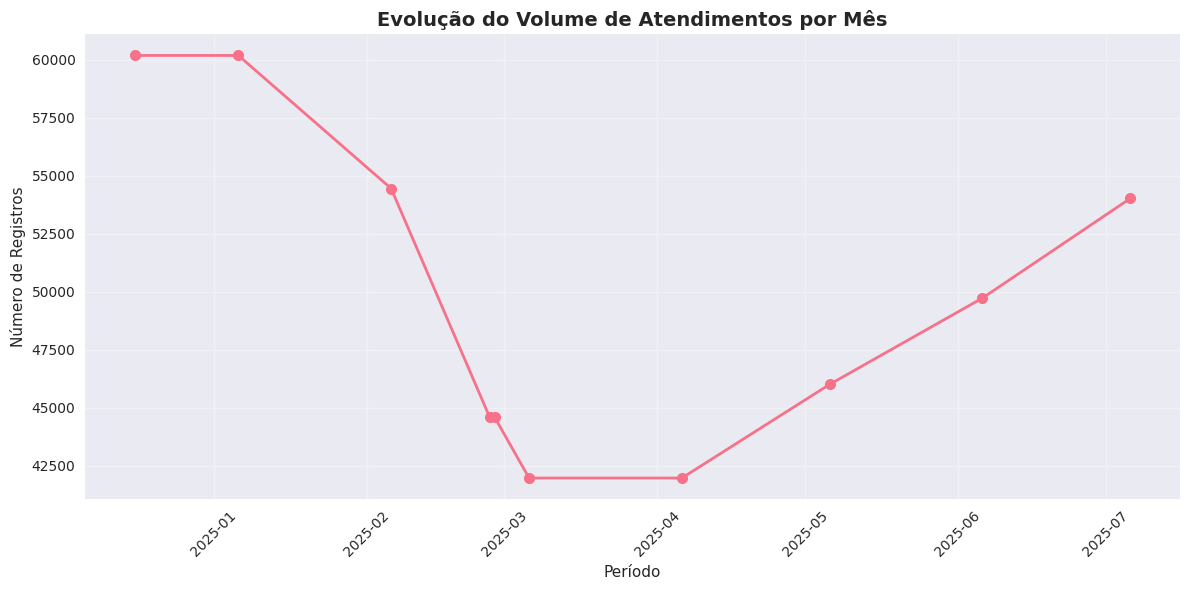


Estatísticas do Volume:
Total de registros: 497,663
Média mensal: 49766
Mínimo: 41,962
Máximo: 60,187
Desvio padrão: 7046


In [3]:
# Análise da evolução do volume de dados por período
print("Evolução do Volume de Dados por Período:")
print("=" * 50)

volumes = {}
for periodo, df in datasets_mensais.items():
    volumes[periodo] = len(df)

# Cria DataFrame com volumes
df_volumes = pd.DataFrame(list(volumes.items()), columns=['Periodo', 'Registros'])
df_volumes['Periodo'] = pd.to_datetime(df_volumes['Periodo'], format='%Y-%m-%d')
df_volumes = df_volumes.sort_values('Periodo')

print(df_volumes)

# Gráfico de evolução temporal
plt.figure(figsize=(12, 6))
plt.plot(df_volumes['Periodo'], df_volumes['Registros'], marker='o', linewidth=2, markersize=8)
plt.title('Evolução do Volume de Atendimentos por Mês', fontsize=14, fontweight='bold')
plt.xlabel('Período')
plt.ylabel('Número de Registros')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Estatísticas
print(f"\nEstatísticas do Volume:")
print(f"Total de registros: {df_volumes['Registros'].sum():,}")
print(f"Média mensal: {df_volumes['Registros'].mean():.0f}")
print(f"Mínimo: {df_volumes['Registros'].min():,}")
print(f"Máximo: {df_volumes['Registros'].max():,}")
print(f"Desvio padrão: {df_volumes['Registros'].std():.0f}")

## 3. Análise Consolidada dos Dados

In [4]:
# Informações básicas do dataset consolidado
print("Informações do Dataset Consolidado:")
print("=" * 50)
print(f"Dimensões: {df_completo.shape[0]:,} registros x {df_completo.shape[1]} colunas")
print(f"Período total: {df_completo['Periodo'].min()} a {df_completo['Periodo'].max()}")
print(f"\nColunas disponíveis:")
for i, col in enumerate(df_completo.columns, 1):
    print(f"{i:2d}. {col}")

# Verificação de valores nulos
print(f"\nColunas com valores nulos:")
nulos = df_completo.isnull().sum()
colunas_com_nulos = nulos[nulos > 0]
if len(colunas_com_nulos) > 0:
    for col, count in colunas_com_nulos.items():
        percentual = (count / len(df_completo)) * 100
        print(f"  - {col}: {count:,} ({percentual:.1f}%)")
else:
    print("  Nenhuma coluna com valores nulos")

Informações do Dataset Consolidado:
Dimensões: 497,663 registros x 43 colunas
Período total: 2024-12-16 a 2025-07-06

Colunas disponíveis:
 1. Data do Atendimento
 2. Data de Nascimento
 3. Sexo
 4. Código do Tipo de Unidade
 5. Tipo de Unidade
 6. Código da Unidade
 7. Descrição da Unidade
 8. Código do Procedimento
 9. Descrição do Procedimento
10. Código do CBO
11. Descrição do CBO
12. Código do CID
13. Descrição do CID
14. Solicitação de Exames
15. Qtde Prescrita Farmácia Curitibana
16. Qtde Dispensada Farmácia Curitibana
17. Qtde de Medicamento Não Padronizado
18. Encaminhamento para Atendimento Especialista
19. Área de Atuação
20. Desencadeou Internamento
21. Data do Internamento
22. Estabelecimento Solicitante
23. Estabelecimento Destino
24. CID do Internamento
25. Tratamento no Domicílio
26. Abastecimento
27. Energia Elétrica
28. Tipo de Habitação
29. Destino Lixo
30. Fezes/Urina
31. Cômodos
32. Em Caso de Doença
33. Grupo Comunitário
34. Meio de Comunicacao
35. Meio de Transpo

## 4. Análise Temporal Detalhada

In [5]:
# Preparação dos dados temporais
print("Preparando dados temporais...")

# Converte datas
df_completo['Data do Atendimento'] = pd.to_datetime(df_completo['Data do Atendimento'], 
                                                   format='%d/%m/%Y %H:%M:%S', errors='coerce')
df_completo['Data de Nascimento'] = pd.to_datetime(df_completo['Data de Nascimento'], 
                                                  format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Extrai informações temporais
df_completo['Ano'] = df_completo['Data do Atendimento'].dt.year
df_completo['Mes'] = df_completo['Data do Atendimento'].dt.month
df_completo['Dia'] = df_completo['Data do Atendimento'].dt.day
df_completo['DiaSemana'] = df_completo['Data do Atendimento'].dt.day_name()
df_completo['Hora'] = df_completo['Data do Atendimento'].dt.hour
df_completo['Semana'] = df_completo['Data do Atendimento'].dt.isocalendar().week

# Calcula idade
df_completo['Idade'] = (df_completo['Data do Atendimento'] - df_completo['Data de Nascimento']).dt.total_seconds() / (365.25 * 24 * 3600)

print("✓ Dados temporais preparados")

Preparando dados temporais...
✓ Dados temporais preparados


Análise Temporal por Mês:
    Ano  Mes  Atendimentos       Data
0  2024    9         38128 2024-09-01
1  2024   10         70946 2024-10-01
2  2024   11         87486 2024-11-01
3  2024   12         66457 2024-12-01
4  2025    1         68975 2025-01-01
5  2025    2         64645 2025-02-01
6  2025    3         44349 2025-03-01
7  2025    4         35018 2025-04-01
8  2025    5         21659 2025-05-01


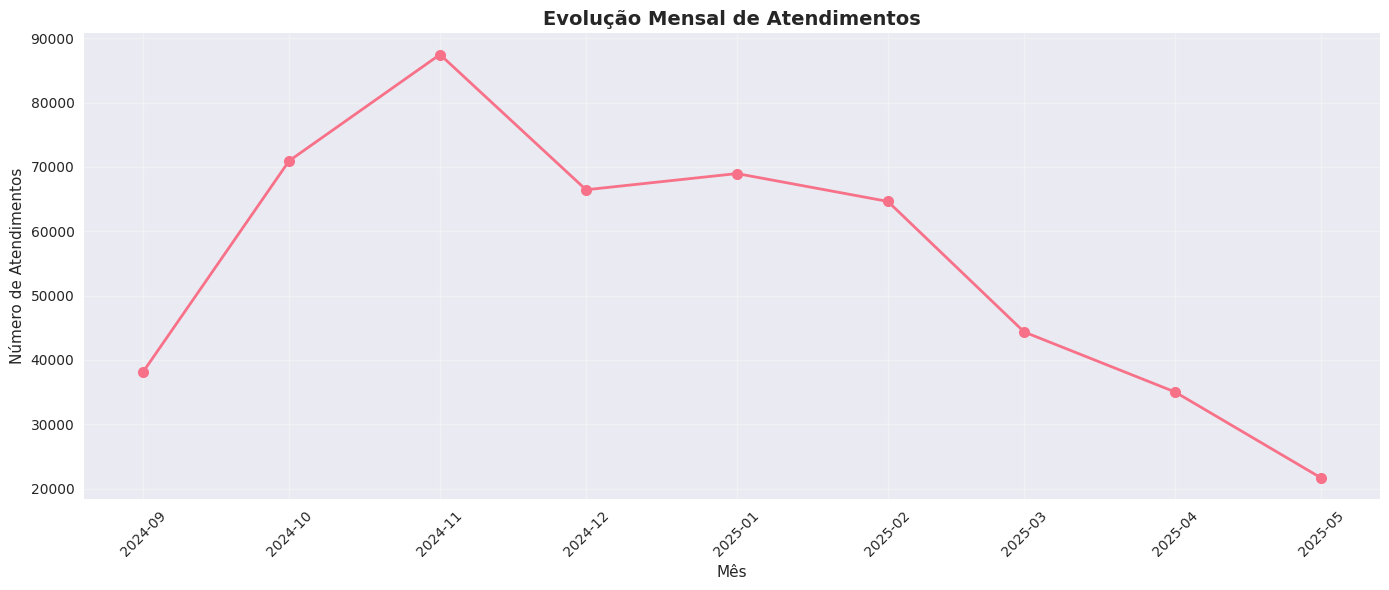

In [6]:
# Análise temporal por mês
print("Análise Temporal por Mês:")
print("=" * 40)

# Agrupa por mês
atendimentos_por_mes = df_completo.groupby(['Ano', 'Mes']).size().reset_index(name='Atendimentos')
atendimentos_por_mes['Data'] = pd.to_datetime({
    'year': atendimentos_por_mes['Ano'],
    'month': atendimentos_por_mes['Mes'],
    'day': 1
})

print(atendimentos_por_mes)

# Gráfico de linha temporal
plt.figure(figsize=(14, 6))
plt.plot(atendimentos_por_mes['Data'], atendimentos_por_mes['Atendimentos'], 
         marker='o', linewidth=2, markersize=8)
plt.title('Evolução Mensal de Atendimentos', fontsize=14, fontweight='bold')
plt.xlabel('Mês')
plt.ylabel('Número de Atendimentos')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Distribuição por Dia da Semana:
DiaSemana
Monday       104553
Tuesday      110791
Wednesday     96565
Thursday      96658
Friday        88863
Saturday        230
Sunday            3
Name: count, dtype: int64


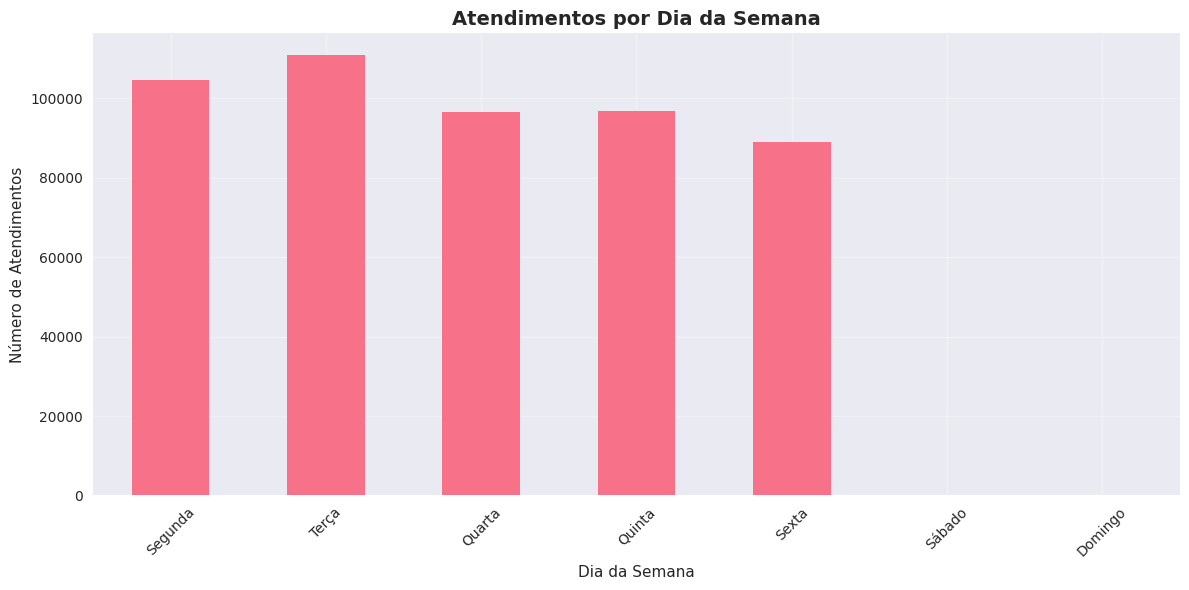

In [7]:
# Análise por dia da semana
print("Distribuição por Dia da Semana:")
print("=" * 40)

# Ordem dos dias da semana
ordem_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dias_pt = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

atendimentos_dia_semana = df_completo['DiaSemana'].value_counts().reindex(ordem_dias)

print(atendimentos_dia_semana)

# Gráfico de barras
plt.figure(figsize=(12, 6))
atendimentos_dia_semana.plot(kind='bar')
plt.title('Atendimentos por Dia da Semana', fontsize=14, fontweight='bold')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Atendimentos')
plt.xticks(range(len(ordem_dias)), dias_pt, rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Análise de Profissionais ao Longo do Tempo

Top 5 Profissionais por Volume Total:
Descrição do CBO
FISIOTERAPEUTA GERAL                 186764
PSICOLOGO CLINICO                    126783
NUTRICIONISTA                         62122
FONOAUDIOLOGO GERAL                   37566
FARMACEUTICO HOSPITALAR E CLINICO     30516
Name: count, dtype: int64


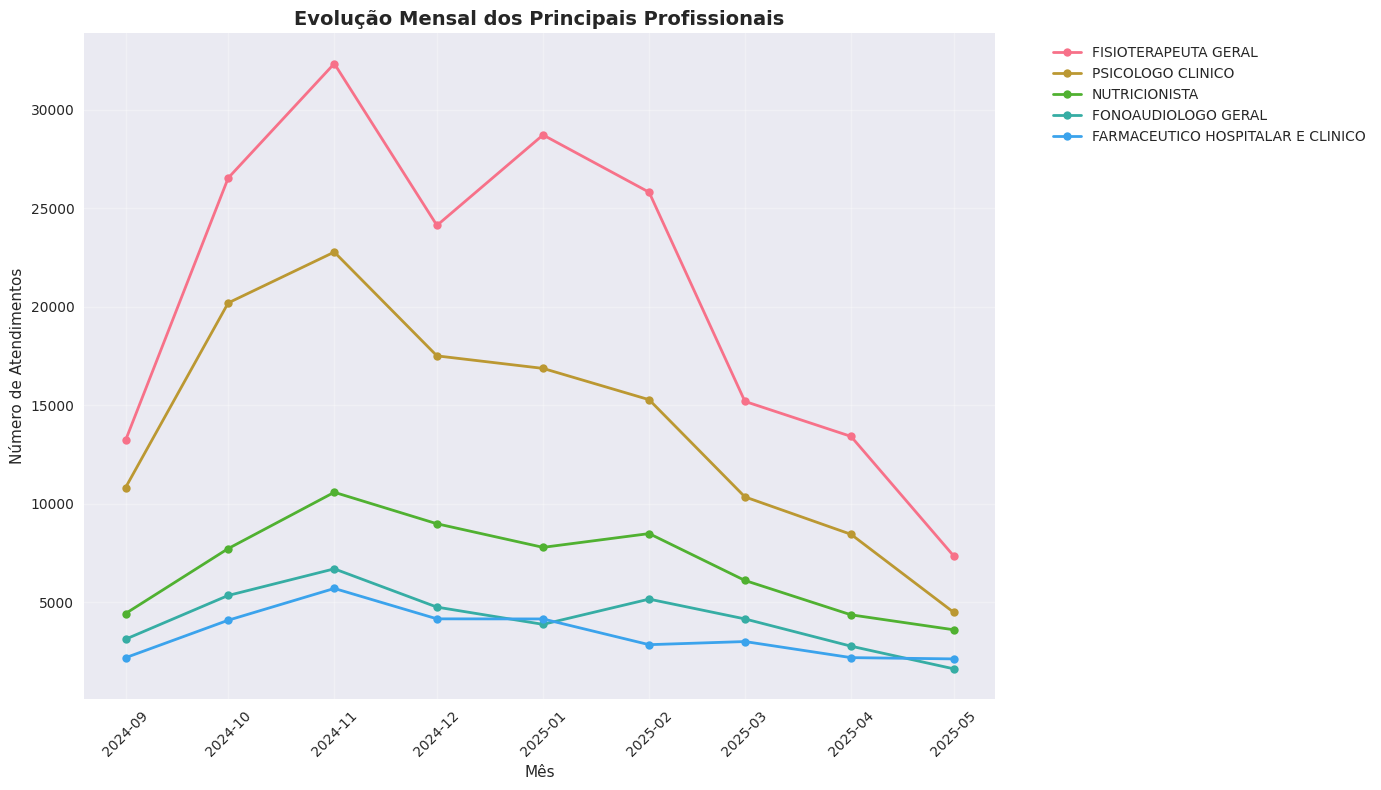

In [8]:
# Evolução dos profissionais mais ativos
print("Top 5 Profissionais por Volume Total:")
print("=" * 45)

top_profissionais = df_completo['Descrição do CBO'].value_counts().head(5)
print(top_profissionais)

# Análise temporal dos top profissionais
profissionais_principais = top_profissionais.index.tolist()

# Filtra dados dos profissionais principais
df_profissionais = df_completo[df_completo['Descrição do CBO'].isin(profissionais_principais)]

# Agrupa por mês e profissional
evolucao_profissionais = df_profissionais.groupby(['Ano', 'Mes', 'Descrição do CBO']).size().reset_index(name='Atendimentos')
evolucao_profissionais['Data'] = pd.to_datetime({'year': evolucao_profissionais['Ano'], 'month': evolucao_profissionais['Mes'], 'day': 1})

# Gráfico de evolução
plt.figure(figsize=(14, 8))
for profissional in profissionais_principais:
    dados_prof = evolucao_profissionais[evolucao_profissionais['Descrição do CBO'] == profissional]
    plt.plot(dados_prof['Data'], dados_prof['Atendimentos'], 
             marker='o', linewidth=2, markersize=6, label=profissional)

plt.title('Evolução Mensal dos Principais Profissionais', fontsize=14, fontweight='bold')
plt.xlabel('Mês')
plt.ylabel('Número de Atendimentos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Análise Geográfica Temporal

Top 10 Bairros por Volume Total:
Bairro
CIDADE INDUSTRIAL    73419
SITIO CERCADO        37740
CAJURU               29155
UBERABA              24187
ALTO BOQUEIRAO       20445
BOQUEIRAO            18759
TATUQUARA            17411
PINHEIRINHO          16731
XAXIM                15446
BAIRRO ALTO          14680
Name: count, dtype: int64


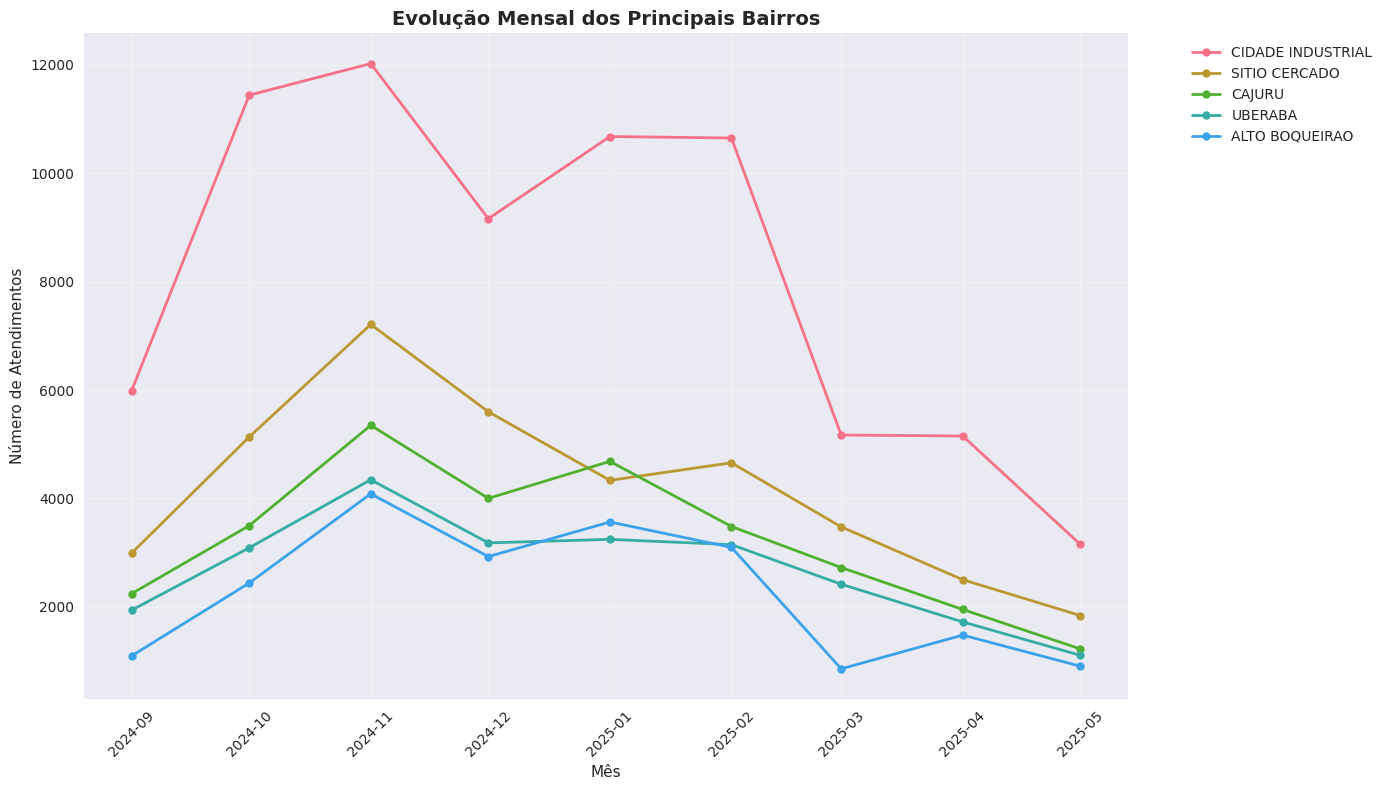

In [9]:
# Evolução dos bairros mais atendidos
print("Top 10 Bairros por Volume Total:")
print("=" * 40)

top_bairros = df_completo['Bairro'].value_counts().head(10)
print(top_bairros)

# Análise temporal dos top bairros
bairros_principais = top_bairros.index.tolist()

# Filtra dados dos bairros principais
df_bairros = df_completo[df_completo['Bairro'].isin(bairros_principais)]

# Agrupa por mês e bairro
evolucao_bairros = df_bairros.groupby(['Ano', 'Mes', 'Bairro']).size().reset_index(name='Atendimentos')
evolucao_bairros['Data'] = pd.to_datetime({'year': evolucao_bairros['Ano'], 'month': evolucao_bairros['Mes'], 'day': 1})

# Gráfico de evolução (top 5 bairros para melhor visualização)
plt.figure(figsize=(14, 8))
for bairro in bairros_principais[:5]:
    dados_bairro = evolucao_bairros[evolucao_bairros['Bairro'] == bairro]
    plt.plot(dados_bairro['Data'], dados_bairro['Atendimentos'], 
             marker='o', linewidth=2, markersize=6, label=bairro)

plt.title('Evolução Mensal dos Principais Bairros', fontsize=14, fontweight='bold')
plt.xlabel('Mês')
plt.ylabel('Número de Atendimentos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Análise de Sazonalidade

Análise de Sazonalidade por Mês:
   Mes  Atendimentos   Mes_Nome
0    1         68975    Janeiro
1    2         64645  Fevereiro
2    3         44349      Março
3    4         35018      Abril
4    5         21659       Maio
5    9         38128   Setembro
6   10         70946    Outubro
7   11         87486   Novembro
8   12         66457   Dezembro


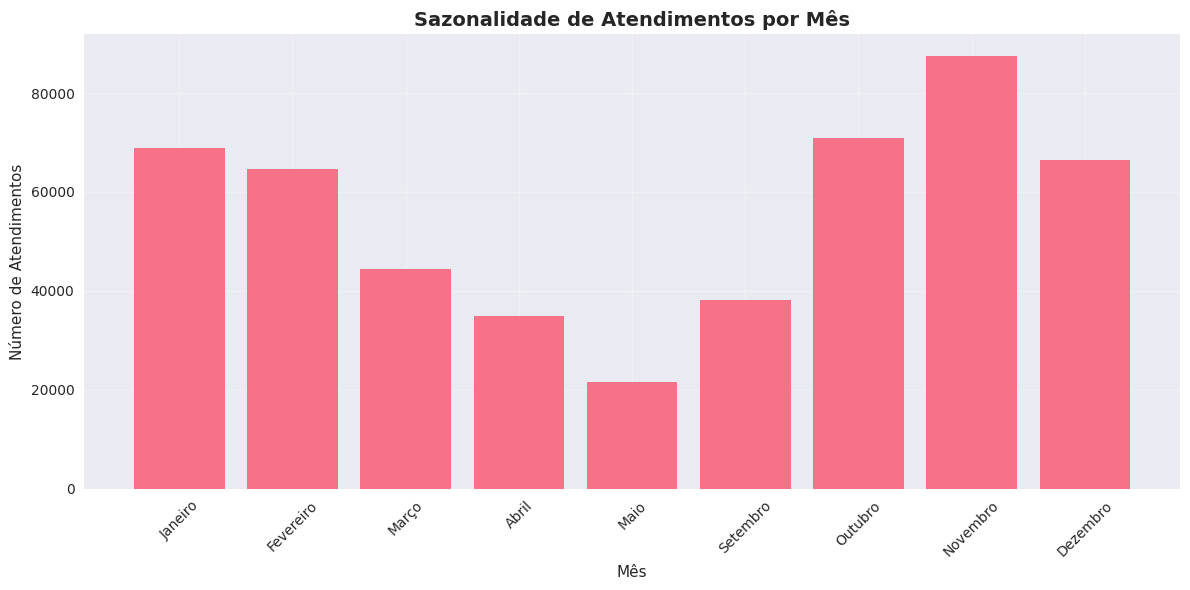

In [10]:
# Análise de sazonalidade por mês
print("Análise de Sazonalidade por Mês:")
print("=" * 40)

# Agrupa por mês (independente do ano)
sazonalidade_mes = df_completo.groupby('Mes').size().reset_index(name='Atendimentos')
sazonalidade_mes['Mes_Nome'] = sazonalidade_mes['Mes'].map({
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
})

print(sazonalidade_mes)

# Gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(sazonalidade_mes['Mes_Nome'], sazonalidade_mes['Atendimentos'])
plt.title('Sazonalidade de Atendimentos por Mês', fontsize=14, fontweight='bold')
plt.xlabel('Mês')
plt.ylabel('Número de Atendimentos')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Análise de Padrões Horários

Distribuição por Hora do Dia:
Hora
0         5
6        70
7     20683
8     46305
9     58931
10    59196
11    60727
12    53650
13    29022
14    39435
15    36138
16    37646
17    30618
18    24512
19      697
20       19
21        9
Name: count, dtype: int64


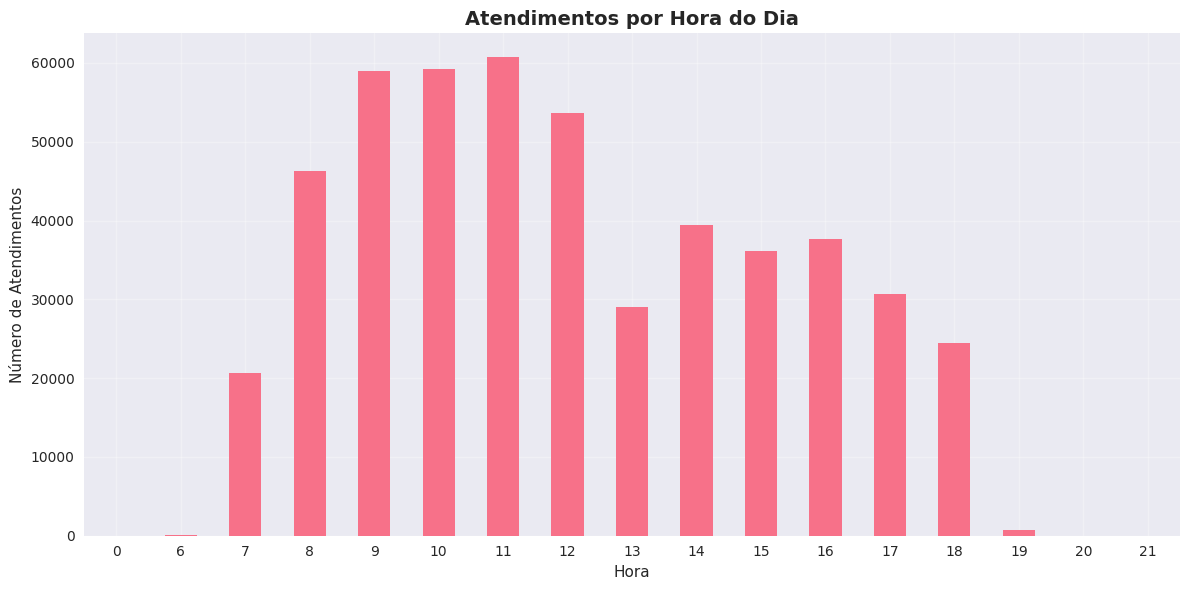


Padrões por Dia da Semana e Hora:


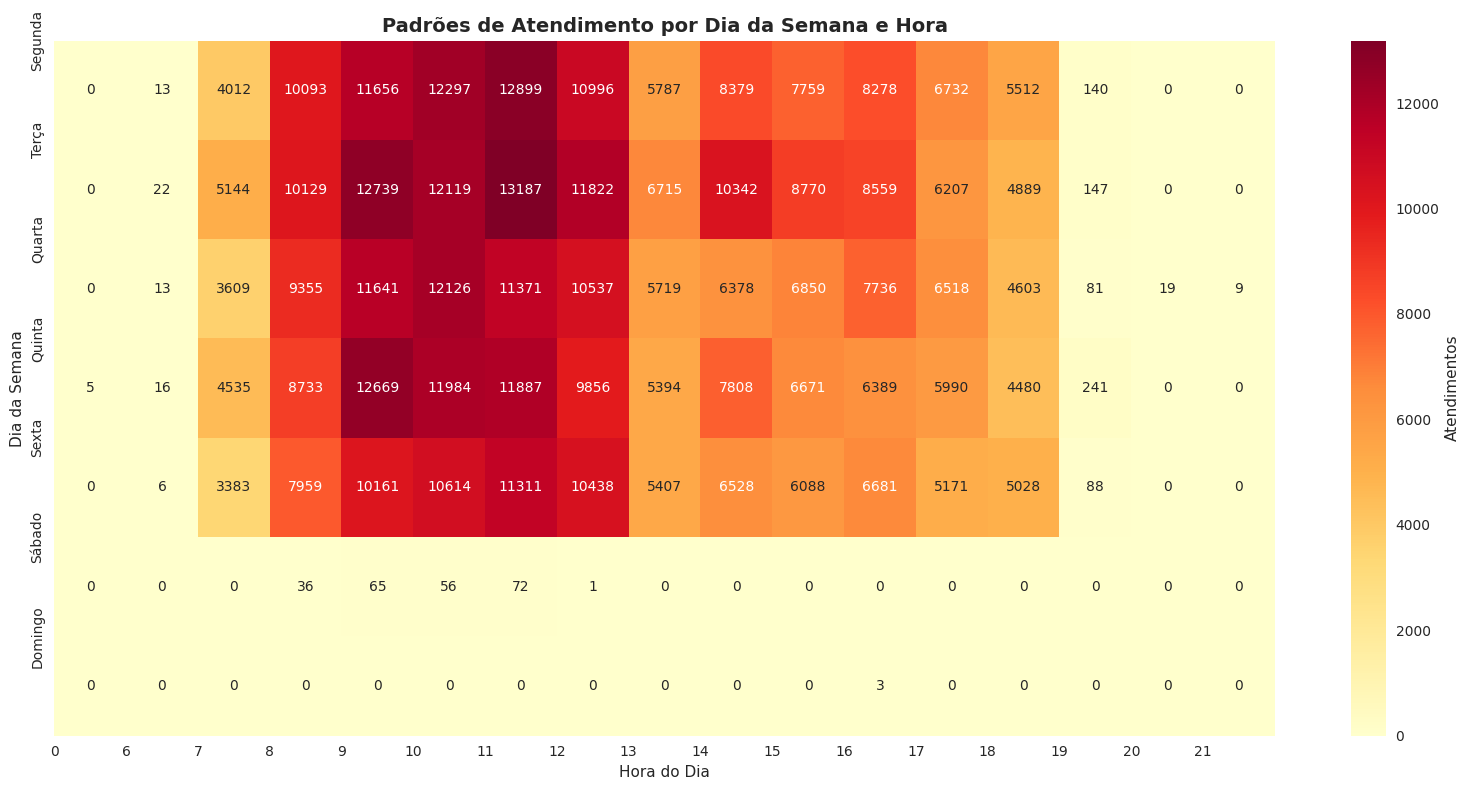

In [11]:
# Análise de padrões horários
print("Distribuição por Hora do Dia:")
print("=" * 35)

atendimentos_por_hora = df_completo['Hora'].value_counts().sort_index()
print(atendimentos_por_hora)

# Gráfico de barras
plt.figure(figsize=(12, 6))
atendimentos_por_hora.plot(kind='bar')
plt.title('Atendimentos por Hora do Dia', fontsize=14, fontweight='bold')
plt.xlabel('Hora')
plt.ylabel('Número de Atendimentos')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análise por dia da semana e hora
print("\nPadrões por Dia da Semana e Hora:")
print("=" * 40)

# Cria matriz de calor
pivot_hora_dia = df_completo.pivot_table(
    index='DiaSemana', 
    columns='Hora', 
    values='cod_usuario', 
    aggfunc='count', 
    fill_value=0
)

# Reordena os dias da semana
pivot_hora_dia = pivot_hora_dia.reindex(ordem_dias)

# Gráfico de calor
plt.figure(figsize=(16, 8))
sns.heatmap(pivot_hora_dia, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Atendimentos'})
plt.title('Padrões de Atendimento por Dia da Semana e Hora', fontsize=14, fontweight='bold')
plt.xlabel('Hora do Dia')
plt.ylabel('Dia da Semana')
plt.xticks(range(len(pivot_hora_dia.columns)), pivot_hora_dia.columns)
plt.yticks(range(len(pivot_hora_dia.index)), [dias_pt[ordem_dias.index(d)] for d in pivot_hora_dia.index])
plt.tight_layout()
plt.show()

## 9. Resumo Estatístico Completo

In [12]:
# Resumo estatístico completo
print("RESUMO ESTATÍSTICO COMPLETO")
print("=" * 50)

# Estatísticas gerais
print(f"\n📊 ESTATÍSTICAS GERAIS:")
print(f"Total de atendimentos: {len(df_completo):,}")
print(f"Período analisado: {df_completo['Data do Atendimento'].min().strftime('%d/%m/%Y')} a {df_completo['Data do Atendimento'].max().strftime('%d/%m/%Y')}")
print(f"Duração total: {(df_completo['Data do Atendimento'].max() - df_completo['Data do Atendimento'].min()).days} dias")
print(f"Média diária: {len(df_completo) / ((df_completo['Data do Atendimento'].max() - df_completo['Data do Atendimento'].min()).days):.0f} atendimentos")

# Estatísticas por categoria
print(f"\n🏥 UNIDADES DE SAÚDE:")
print(f"Unidades únicas: {df_completo['Código da Unidade'].nunique()}")
print(f"Tipos de unidade: {df_completo['Tipo de Unidade'].nunique()}")

print(f"\n👨‍⚕️ PROFISSIONAIS:")
print(f"Profissionais únicos: {df_completo['cod_profissional'].nunique()}")
print(f"Categorias profissionais: {df_completo['Descrição do CBO'].nunique()}")

print(f"\n👥 PACIENTES:")
print(f"Pacientes únicos: {df_completo['cod_usuario'].nunique()}")
print(f"Bairros atendidos: {df_completo['Bairro'].nunique()}")
print(f"Média de idade: {df_completo['Idade'].mean():.1f} anos")
print(f"Idade mínima: {df_completo['Idade'].min():.1f} anos")
print(f"Idade máxima: {df_completo['Idade'].max():.1f} anos")

print(f"\n📋 PROCEDIMENTOS:")
print(f"Tipos de procedimentos: {df_completo['Código do Procedimento'].nunique()}")
print(f"Diagnósticos únicos: {df_completo['Código do CID'].nunique()}")

# Top 3 de cada categoria
print(f"\n🏆 TOP 3 PROFISSIONAIS:")
top_prof = df_completo['Descrição do CBO'].value_counts().head(3)
for i, (prof, count) in enumerate(top_prof.items(), 1):
    print(f"{i}. {prof}: {count:,} atendimentos")

print(f"\n🏆 TOP 3 BAIRROS:")
top_bairros = df_completo['Bairro'].value_counts().head(3)
for i, (bairro, count) in enumerate(top_bairros.items(), 1):
    print(f"{i}. {bairro}: {count:,} atendimentos")

print(f"\n🏆 TOP 3 PROCEDIMENTOS:")
top_proc = df_completo['Descrição do Procedimento'].value_counts().head(3)
for i, (proc, count) in enumerate(top_proc.items(), 1):
    print(f"{i}. {proc}: {count:,} atendimentos")

RESUMO ESTATÍSTICO COMPLETO

📊 ESTATÍSTICAS GERAIS:
Total de atendimentos: 497,663
Período analisado: 02/09/2024 a 31/05/2025
Duração total: 271 dias
Média diária: 1836 atendimentos

🏥 UNIDADES DE SAÚDE:
Unidades únicas: 117
Tipos de unidade: 3

👨‍⚕️ PROFISSIONAIS:
Profissionais únicos: 232
Categorias profissionais: 10

👥 PACIENTES:
Pacientes únicos: 77487
Bairros atendidos: 133
Média de idade: 41.7 anos
Idade mínima: 0.0 anos
Idade máxima: 124.7 anos

📋 PROCEDIMENTOS:
Tipos de procedimentos: 19
Diagnósticos únicos: 1

🏆 TOP 3 PROFISSIONAIS:
1. FISIOTERAPEUTA GERAL: 186,764 atendimentos
2. PSICOLOGO CLINICO: 126,783 atendimentos
3. NUTRICIONISTA: 62,122 atendimentos

🏆 TOP 3 BAIRROS:
1. CIDADE INDUSTRIAL: 73,419 atendimentos
2. SITIO CERCADO: 37,740 atendimentos
3. CAJURU: 29,155 atendimentos

🏆 TOP 3 PROCEDIMENTOS:
1. CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA ATENCAO PRIMARIA (EXCETO MEDICO): 320,719 atendimentos
2. CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA ATENCAO ESPECIALI

## 10. Salvando Dataset Consolidado

In [ ]:
# Salva o dataset consolidado para uso futuro
print("Salvando dataset consolidado...")

# Remove colunas temporárias criadas para análise
colunas_para_remover = ['Ano', 'Mes', 'Dia', 'DiaSemana', 'Hora', 'Semana']
df_consolidado_final = df_completo.drop(columns=colunas_para_remover, errors='ignore')

# Salva em formato CSV
arquivo_saida = 'Dados/dataset_consolidado_completo.csv'
df_consolidado_final.to_csv(arquivo_saida, index=False, sep=';', encoding='utf-8')

print(f"✓ Dataset consolidado salvo em: {arquivo_saida}")
print(f"  - {len(df_consolidado_final):,} registros")
print(f"  - {df_consolidado_final.shape[1]} colunas")
print(f"  - Tamanho do arquivo: {os.path.getsize(arquivo_saida) / (1024*1024):.1f} MB")

# Tenta salvar em formato parquet (mais eficiente)
try:
    arquivo_parquet = 'Dados/dataset_consolidado_completo.parquet'
    df_consolidado_final.to_parquet(arquivo_parquet, index=False)
    print(f"✓ Dataset também salvo em formato parquet: {arquivo_parquet}")
    print(f"  - Tamanho do arquivo: {os.path.getsize(arquivo_parquet) / (1024*1024):.1f} MB")
except ImportError as e:
    print("⚠️  Formato parquet não disponível (pyarrow ou fastparquet não instalados)")
    print("   Para instalar: pip install pyarrow fastparquet")
    print("   Dataset salvo apenas em formato CSV")
except Exception as e:
    print(f"⚠️  Erro ao salvar em parquet: {e}")
    print("   Dataset salvo apenas em formato CSV")
    
    # Tenta salvar em formato pickle como alternativa
    try:
        arquivo_pickle = 'Dados/dataset_consolidado_completo.pkl'
        df_consolidado_final.to_pickle(arquivo_pickle)
        print(f"✓ Dataset salvo em formato pickle como alternativa: {arquivo_pickle}")
        print(f"  - Tamanho do arquivo: {os.path.getsize(arquivo_pickle) / (1024*1024):.1f} MB")
    except Exception as e2:
        print(f"⚠️  Também não foi possível salvar em pickle: {e2}")
        print("   Dataset salvo apenas em formato CSV")